Credit Card Fraud Detection


----------
- Transform data to contain numeric values
- Resampled data by oversampling using RandomOverSampler
- Evaluated all the algorithms for accuracy
- Chose best 2 algorithms, scaled and estimated accuracy
- Achieved 100% accuracy, [ precision, recall and F1 score = 1.0]

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

creditcard.csv



In [2]:
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 

In [3]:
# Loading the dataset
# Removing header names as they are not meaningful
url = '../input/creditcard.csv'
dataset = read_csv(url, header = None)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Shape
print(dataset.shape)

(284808, 31)


In [5]:
#types
set_option('display.max_rows', 500)
print(dataset.dtypes)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
30    object
dtype: object


In [6]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [7]:
dataset = dataset.apply(pd.to_numeric, errors = 'coerce')

In [8]:
print(dataset.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
dtype: object


In [9]:
# head
set_option('precision', 3)
print(dataset.describe())

               0          1          2          3          4          5   \
count  284807.000  2.848e+05  2.848e+05  2.848e+05  2.848e+05  2.848e+05   
mean    94813.860  3.920e-15  5.688e-16 -8.769e-15  2.782e-15 -1.553e-15   
std     47488.146  1.959e+00  1.651e+00  1.516e+00  1.416e+00  1.380e+00   
min         0.000 -5.641e+01 -7.272e+01 -4.833e+01 -5.683e+00 -1.137e+02   
25%     54201.500 -9.204e-01 -5.985e-01 -8.904e-01 -8.486e-01 -6.916e-01   
50%     84692.000  1.811e-02  6.549e-02  1.798e-01 -1.985e-02 -5.434e-02   
75%    139320.500  1.316e+00  8.037e-01  1.027e+00  7.433e-01  6.119e-01   
max    172792.000  2.455e+00  2.206e+01  9.383e+00  1.688e+01  3.480e+01   

              6          7          8          9      ...             21  \
count  2.848e+05  2.848e+05  2.848e+05  2.848e+05     ...      2.848e+05   
mean   2.011e-15 -1.694e-15 -1.927e-16 -3.137e-15     ...      1.537e-16   
std    1.332e+00  1.237e+00  1.194e+00  1.099e+00     ...      7.345e-01   
min   -2.61

In [10]:
print(dataset.groupby(30).size())

30
0.0    284315
1.0       492
dtype: int64


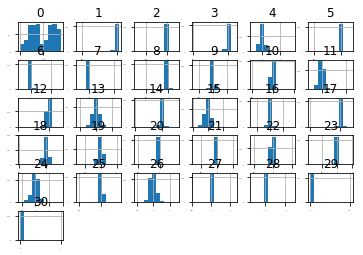

In [11]:
# Histogram
dataset.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1)
pyplot.show()
#sm = SMOTE(random_state=42)
#dset_resampled = sm.fit_sample(dataset)

In [12]:
# Resample data by over sampling using RandomSampler
# Change NaN and infinite values
array = dataset.values
inf_indices = np.where(np.isinf(array))
nan_indices = np.where(np.isnan(array))
print(inf_indices, type(inf_indices))
print(nan_indices, type(nan_indices))
for row, col in zip(*inf_indices):
    array[row,col] = -1
    
for row, col in zip(*nan_indices):
    array[row,col] = 0
#array[]
X = array[:, 0:30]
y = array[:, 30]
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X, y)

validation_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
    test_size=validation_size, random_state=42)

(array([], dtype=int64), array([], dtype=int64)) <class 'tuple'>
(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])) <class 'tuple'>


In [13]:
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('DT' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))

In [14]:

# Evaluate each algorithm for accuracy
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=42)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.940821 (0.003543)
LDA: 0.919847 (0.001420)
KNN: 0.998943 (0.000160)
DT: 0.999738 (0.000076)
NB: 0.865040 (0.000774)


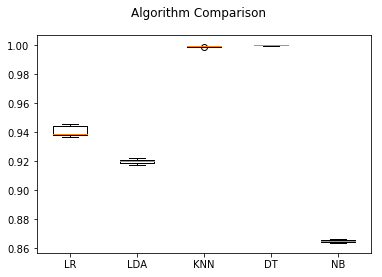

In [15]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [16]:
# prepare the model knn
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_knn = KNeighborsClassifier()
model_knn.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_knn.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.999630694558
confusion matrix: 
[[56705    42]
 [    0 56980]]
classification report: 
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     56747
        1.0       1.00      1.00      1.00     56980

avg / total       1.00      1.00      1.00    113727



In [17]:
# Prepare Decision Tree Model
model_dt = DecisionTreeClassifier()
model_dt.fit(rescaledX, y_train)
rescaledValidationX = scaler.transform(X_test)
predictions = model_dt.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.999657073518
confusion matrix: 
[[56708    39]
 [    0 56980]]
classification report: 
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     56747
        1.0       1.00      1.00      1.00     56980

avg / total       1.00      1.00      1.00    113727

